In [24]:
import pickle
import math
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [25]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [26]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename,'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [27]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [28]:
def seperate_verses(corpus):  
    # Separating verses
    split_corpus = corpus.split('\\r\\n')
    return split_corpus

In [29]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]'% re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens 
              if word.isalpha()]
    
    # make lower case
    tokens = [word.lower() for word in tokens]
    
    return tokens

In [30]:
def clean_corpus(corpus):
    corpus = seperate_verses(corpus)
    cleaned_corpus = []
    for i in range(len(corpus)):
        cleaned_doc = clean_doc(corpus[i])
        cleaned_corpus.append(cleaned_doc)
        
    return cleaned_corpus

In [31]:
def corpus_docs_list_to_str(corpus):
    new_corpus = []
    for i in range(len(corpus)):
        new_doc = ' '.join(corpus[i])
        new_corpus.append(new_doc)
        
    return new_corpus

In [32]:
def corpus_to_tokens_to_sequences(corpus,sequence_length=50):
    tokens = ' '.join(corpus)
    tokens = tokens.split()
    # organize into sequences of tokens
    length = sequence_length + 1
    sequences = list()
    for i in range(length, len(tokens)):
        # select sequence of tokens
        seq = tokens[i-length:i]
        # convert into a line
        line = ' '.join(seq)
        # store
        sequences.append(line)
    print('Total Sequences: %d' % len(sequences))
    return sequences

In [10]:
# Opening file as bytes due to non-ascii character
with open('quran_english.txt', 'rb') as f:
    quran = f.read()

In [11]:
quran = str(quran)

In [33]:
quran

'b\'1|1|In the name of Allah, Most Gracious, Most Merciful.,,,,,,,,,,,,,,\\r\\n1|2|Praise be to Allah, the Cherisher and Sustainer of the worlds;,,,,,,,,,,,,,,,\\r\\n1|3|Most Gracious, Most Merciful;,,,,,,,,,,,,,,,\\r\\n1|4|Master of the Day of Judgment.,,,,,,,,,,,,,,,,\\r\\n1|5|Thee do we worship, and Thine aid we seek.,,,,,,,,,,,,,,,\\r\\n1|6|Show us the straight way,,,,,,,,,,,,,,,,\\r\\n1|7|The way of those on whom Thou hast bestowed Thy Grace, those whose (portion) is not wrath, and who go not astray.,,,,,,,,,,,,,,\\r\\n2|1|A.L.M.,,,,,,,,,,,,,,,,\\r\\n2|2|This is the Book; in it is guidance sure, without doubt, to those who fear Allah;,,,,,,,,,,,,,,\\r\\n2|3|Who believe in the Unseen, are steadfast in prayer, and spend out of what We have provided for them;,,,,,,,,,,,,,,\\r\\n2|4|And who believe in the Revelation sent to thee, and sent before thy time, and (in their hearts) have the assurance of the Hereafter.,,,,,,,,,,,,,,\\r\\n2|5|They are on (true) guidance, from their Lord, and

In [34]:
# Clean entire old_testament
clean_quran = clean_corpus(quran)

In [35]:
clean_quran

[['the', 'name', 'of', 'allah', 'most', 'gracious', 'most', 'merciful'],
 ['be',
  'to',
  'allah',
  'the',
  'cherisher',
  'and',
  'sustainer',
  'of',
  'the',
  'worlds'],
 ['gracious', 'most', 'merciful'],
 ['of', 'the', 'day', 'of', 'judgment'],
 ['do', 'we', 'worship', 'and', 'thine', 'aid', 'we', 'seek'],
 ['us', 'the', 'straight', 'way'],
 ['way',
  'of',
  'those',
  'on',
  'whom',
  'thou',
  'hast',
  'bestowed',
  'thy',
  'grace',
  'those',
  'whose',
  'portion',
  'is',
  'not',
  'wrath',
  'and',
  'who',
  'go',
  'not',
  'astray'],
 [],
 ['is',
  'the',
  'book',
  'in',
  'it',
  'is',
  'guidance',
  'sure',
  'without',
  'doubt',
  'to',
  'those',
  'who',
  'fear',
  'allah'],
 ['believe',
  'in',
  'the',
  'unseen',
  'are',
  'steadfast',
  'in',
  'prayer',
  'and',
  'spend',
  'out',
  'of',
  'what',
  'we',
  'have',
  'provided',
  'for',
  'them'],
 ['who',
  'believe',
  'in',
  'the',
  'revelation',
  'sent',
  'to',
  'thee',
  'and',
  'sen

In [15]:
# Converting verses from lists to strings
clean_quran = corpus_docs_list_to_str(clean_quran)

In [16]:
clean_quran

['the name of allah most gracious most merciful',
 'be to allah the cherisher and sustainer of the worlds',
 'gracious most merciful',
 'of the day of judgment',
 'do we worship and thine aid we seek',
 'us the straight way',
 'way of those on whom thou hast bestowed thy grace those whose portion is not wrath and who go not astray',
 '',
 'is the book in it is guidance sure without doubt to those who fear allah',
 'believe in the unseen are steadfast in prayer and spend out of what we have provided for them',
 'who believe in the revelation sent to thee and sent before thy time and in their hearts have the assurance of the hereafter',
 'are on true guidance from their lord and it is these who will prosper',
 'to those who reject faith it is the same to them whether thou warn them or do not warn them they will not believe',
 'hath set a seal on their hearts and on their hearing and on their eyes is a veil great is the penalty they incur',
 'the people there are some who say we believe i

In [22]:
# Export clean quran
out_filename = 'clean_quran.txt'
save_doc(clean_quran, out_filename)

In [17]:
# saving quranament sequences to txt file
quran_sequences = corpus_to_tokens_to_sequences(clean_quran)
out_filename = 'quran_sequences.txt'
save_doc(quran_sequences, out_filename)

Total Sequences: 156893


## EDA

In [52]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        colormap='seismic',
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12),dpi=300)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

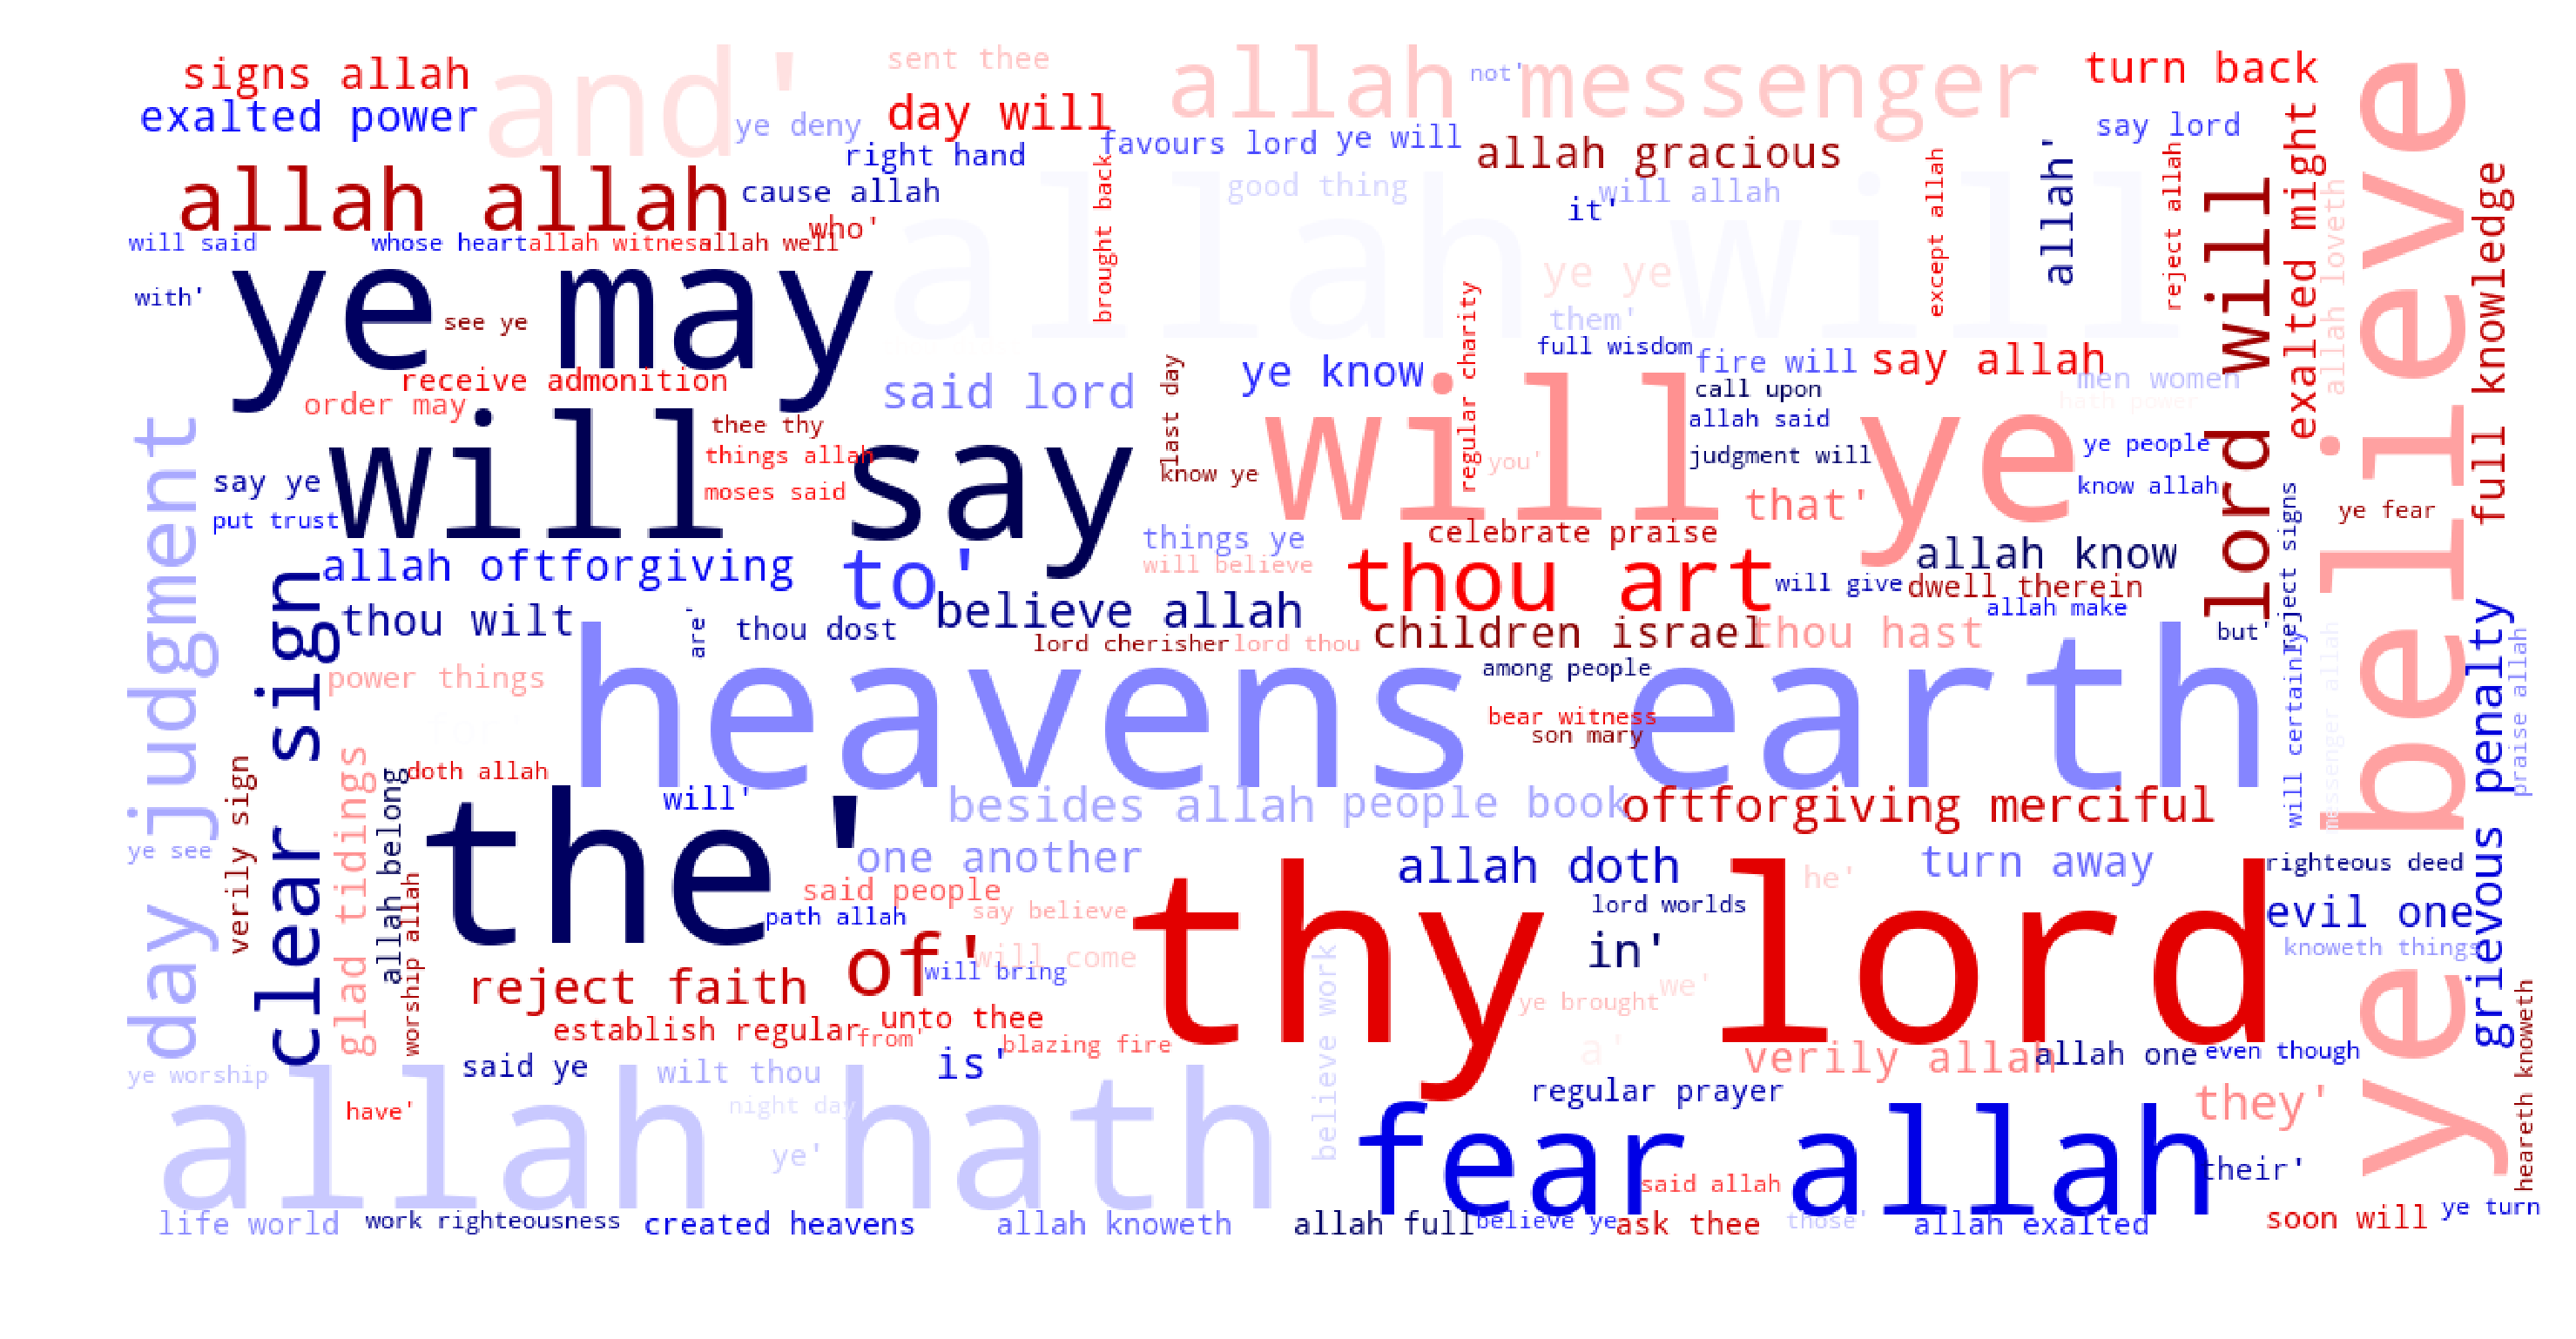

In [53]:
show_wordcloud(quran_sequences)

### Cleaning Data
- removing stopwords
- lemmatization and stemming

In [37]:
stop_words = stopwords.words('english')

# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove stopwords from each
no_stop = [remove_stopwords(r.split()) for r in quran_sequences]

In [38]:
def tokenize_corpus(reviews):
    tokenized_reviews = []
    for review in reviews:
        tokenized_reviews.append(word_tokenize(review))
    return tokenized_reviews        

In [39]:
quran_tokenized = tokenize_corpus(no_stop)

In [40]:
def stemming_corpus(reviews):
    stemmed_reviews = []
    stemmer= PorterStemmer()
    for review in reviews:
        stemmed_reviews.append([stemmer.stem(word) for word in review])
    return stemmed_reviews

In [41]:
quran_stemming = stemming_corpus(quran_tokenized)

In [43]:
def lemmatize_corpus(reviews):
    lemmatized_reviews = []
    lemmatizer=WordNetLemmatizer()
    for review in reviews:
        lemmatized_reviews.append([lemmatizer.lemmatize(word) for word in review])
    return lemmatized_reviews

In [44]:
quran_lemmatized = lemmatize_corpus(quran_tokenized)

In [45]:
quran

'b\'1|1|In the name of Allah, Most Gracious, Most Merciful.,,,,,,,,,,,,,,\\r\\n1|2|Praise be to Allah, the Cherisher and Sustainer of the worlds;,,,,,,,,,,,,,,,\\r\\n1|3|Most Gracious, Most Merciful;,,,,,,,,,,,,,,,\\r\\n1|4|Master of the Day of Judgment.,,,,,,,,,,,,,,,,\\r\\n1|5|Thee do we worship, and Thine aid we seek.,,,,,,,,,,,,,,,\\r\\n1|6|Show us the straight way,,,,,,,,,,,,,,,,\\r\\n1|7|The way of those on whom Thou hast bestowed Thy Grace, those whose (portion) is not wrath, and who go not astray.,,,,,,,,,,,,,,\\r\\n2|1|A.L.M.,,,,,,,,,,,,,,,,\\r\\n2|2|This is the Book; in it is guidance sure, without doubt, to those who fear Allah;,,,,,,,,,,,,,,\\r\\n2|3|Who believe in the Unseen, are steadfast in prayer, and spend out of what We have provided for them;,,,,,,,,,,,,,,\\r\\n2|4|And who believe in the Revelation sent to thee, and sent before thy time, and (in their hearts) have the assurance of the Hereafter.,,,,,,,,,,,,,,\\r\\n2|5|They are on (true) guidance, from their Lord, and

In [46]:
# function to plot most frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

In [47]:
def tokenized_to_series_with_strings(reviews):
    ''' Returns a series from input of a list of lists
    to be used for creating word frequency diagram
    '''
    new_reviews = []
    for i in range(len(reviews)):
        new_reviews.append(' '.join(reviews[i]))

    return pd.Series(new_reviews)

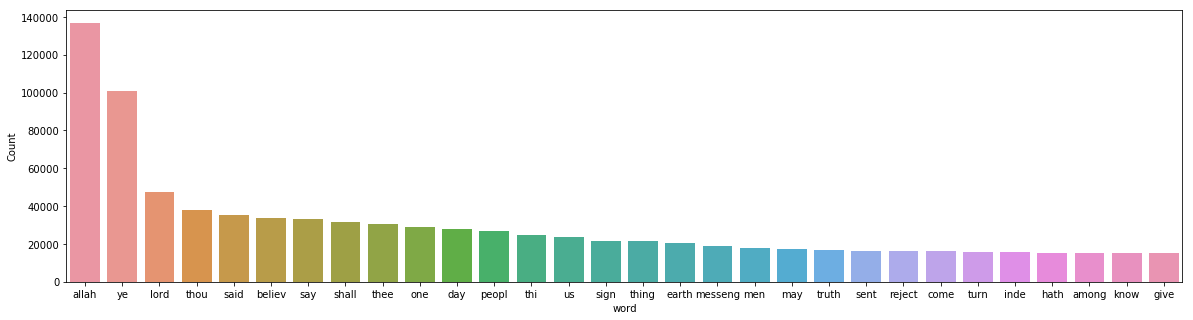

In [69]:
freq_words(tokenized_to_series_with_strings(quran_stemming))

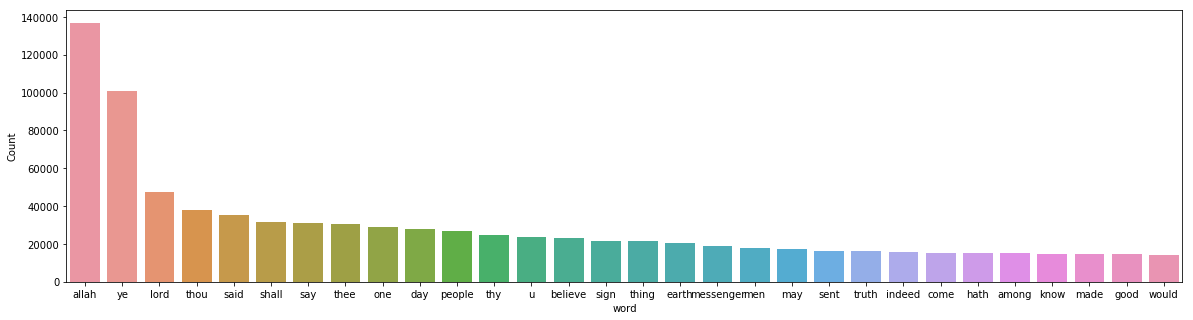

In [70]:
freq_words(tokenized_to_series_with_strings(quran_lemmatized))

### Model Preparation: Count Vectorization

In [87]:
cv = CountVectorizer()
quran_cv_sp_matrix = cv.fit_transform(tokenized_to_series_with_strings(quran_lemmatized))

quran_cv_df = pd.DataFrame(quran_cv_sp_matrix.toarray(), columns=cv.get_feature_names())

In [89]:
tfidf = TfidfVectorizer(stop_words='english')
quran_tfidf_sp_matrix = tfidf.fit_transform(tokenized_to_series_with_strings(quran_lemmatized))

### LSA

- experimenting to find the number of topics that account for most of the variance in the corpus

In [80]:
def lsa_topic_num_finder(start,stop,sparse_matrix):
    '''
    Return a list of the total variance acccounted for
    by each selected number of topics.
    
    >>>lsa_topic_num_finder(10,12,corpus)
    [(10,12.45),(11,15.67)]
    
    '''
    all_var_ratios = []
    for i in range(start,stop):
        lsa = TruncatedSVD(i)
        lsa_doc_topic = lsa.fit_transform(sparse_matrix)
        indiv_var_ratios = sum(lsa.explained_variance_ratio_)
        all_var_ratios.append((i,indiv_var_ratios))
        print((i,indiv_var_ratios))
    return all_var_ratios

In [93]:
lsa = TruncatedSVD(100)
lsa_doc_topic = lsa.fit_transform(quran_cv_sp_matrix)
print(sum(lsa.explained_variance_ratio_))

0.4633792779605912


In [91]:
cv_lsa_topic_nums = lsa_topic_num_finder(1,101,quran_cv_sp_matrix)
tfidf_lsa_topic_nums = lsa_topic_num_finder(1,101,quran_tfidf_sp_matrix)

(1, 0.030392205174098012)
(2, 0.06908454258590258)
(3, 0.09581841854530668)
(4, 0.11053150773689632)
(5, 0.12418531002052738)
(6, 0.13706112393785636)
(7, 0.14833418830947187)
(8, 0.1584154150551813)
(9, 0.1679564624111325)
(10, 0.17729129284785528)
(11, 0.1859409825946168)
(12, 0.19427062747214305)
(13, 0.20178879083725157)
(14, 0.20821891992474567)
(15, 0.2145238365230535)
(16, 0.22044798884195269)
(17, 0.22663805497948106)
(18, 0.23225098869670435)
(19, 0.23756356657615324)
(20, 0.2428108686113478)
(21, 0.24834194811087348)
(22, 0.25320930424963917)
(23, 0.25790973532370776)
(24, 0.26248257952040893)
(25, 0.2668787454296208)
(26, 0.27110611628147246)
(27, 0.2756777445994723)
(28, 0.279665447813085)
(29, 0.2838778700611414)
(30, 0.28788798077359495)
(31, 0.2919499154520575)
(32, 0.29593606968111275)
(33, 0.2997324744255433)
(34, 0.30356072846191406)
(35, 0.30717957356956327)
(36, 0.3109016093952766)
(37, 0.31429458798062365)
(38, 0.31766288614897714)
(39, 0.3212128969357109)
(40, 0.3

In [95]:
lsa_topic_words = pd.DataFrame(lsa.components_.round(3),
             index = [x for x in range(1,101)],
             columns = cv.get_feature_names())

In [81]:
# def display_topics(model, feature_names, no_top_words, topic_names=None):
#     for ix, topic in enumerate(model.components_):
#         if not topic_names or not topic_names[ix]:
#             print("\nTopic ", ix)
#         else:
#             print("\nTopic: '",topic_names[ix],"'")
#         print(", ".join([feature_names[i]
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [96]:
def display_topics(model, feature_names, no_top_words):
    topic_list = []
    for topic_idx, topic in enumerate(model.components_):
        topic_list.append(' '.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print('Topic %d:' % (topic_idx))
        print(topic_list[topic_idx])
    return topic_list

In [97]:
display_topics(lsa, cv.get_feature_names(), 15)

Topic 0:
allah ye lord said say thou shall one believe thee people day thing messenger thy
Topic 1:
ye shall said lord people may deny favour day say worship father eat fire know
Topic 2:
thou lord said thee thy shall people say one day sign art sent indeed come
Topic 3:
thou said thee ye art hast allah wilt didst people dost father moses canst pleasest
Topic 4:
shall day say thee thou judgment penalty fire deed sign men give life see truth
Topic 5:
thou say lord thy ye thee thing art favour may earth wilt would deny heaven
Topic 6:
thee people say sent sign messenger believe book come hath would men truth clear reject
Topic 7:
shall thee thy lord allah fear ye reward favour trust prayer soul garden deny world
Topic 8:
say said shall allah indeed know lord father nay nothing certainly unbeliever messenger come never
Topic 9:
day said thee say one thing earth heaven judgment created know man night father two
Topic 10:
one evil shall thing earth another men know made good give therein tw

['allah ye lord said say thou shall one believe thee people day thing messenger thy',
 'ye shall said lord people may deny favour day say worship father eat fire know',
 'thou lord said thee thy shall people say one day sign art sent indeed come',
 'thou said thee ye art hast allah wilt didst people dost father moses canst pleasest',
 'shall day say thee thou judgment penalty fire deed sign men give life see truth',
 'thou say lord thy ye thee thing art favour may earth wilt would deny heaven',
 'thee people say sent sign messenger believe book come hath would men truth clear reject',
 'shall thee thy lord allah fear ye reward favour trust prayer soul garden deny world',
 'say said shall allah indeed know lord father nay nothing certainly unbeliever messenger come never',
 'day said thee say one thing earth heaven judgment created know man night father two',
 'one evil shall thing earth another men know made good give therein two may heaven',
 'earth heaven thing hath shall created pow

### NMF

In [84]:
nmf = NMF(10)
nmf_doc_topic = nmf.fit_transform(quran_sp_matrix)

In [85]:
nmf_topic_words = pd.DataFrame(nmf.components_.round(3),
             index = [x for x in range(1,11)],
             columns = cv.get_feature_names())

In [86]:
topic_list_cv = display_topics(nmf, cv.get_feature_names(), 15)

Topic 0:
allah thing messenger hath believe one earth fear men good know heaven faith power heart
Topic 1:
ye may know believe back fear favour worship deny thing well turn call see good
Topic 2:
thou thy art wilt hast didst see dost one turn canst truly pleasest indeed power
Topic 3:
lord thy favour deny mercy earth one man verily fear world good garden heaven indeed
Topic 4:
shall therein deed fire reward garden soul companion believe penalty give good certainly evil soon
Topic 5:
said one moses father indeed people came son fear brother abraham joseph behold god man
Topic 6:
thee thy sent give come ask follow hath may truth man messenger way prayer book
Topic 7:
day earth one judgment heaven night thing made life created truth see men penalty give
Topic 8:
say one would come truth indeed know unbeliever nothing nay thing believe evil fire penalty
Topic 9:
people sign sent messenger believe book among clear come came men reject made moses rejected


In [99]:
nmf = NMF(10)
nmf_doc_topic = nmf.fit_transform(tfidf_sp_matrix)

In [88]:
nmf_topic_words = pd.DataFrame(nmf.components_.round(3),
             index = [x for x in range(1,11)],
             columns = tfidf.get_feature_names())

In [89]:
topic_list_tfidf = display_topics(nmf, tfidf.get_feature_names(), 15)

Topic 0:
allah messenger believe hath men fear faith good believer heart thing evil merciful oftforgiving reward
Topic 1:
thou art hast wilt thy didst dost turn canst wast wouldst truly mayest forgive bring
Topic 2:
ye know favour deny believe worship fear turn eat matter receive seek make grateful knew
Topic 3:
shall day judgment penalty deed life garden soul companion night reward evil hell righteous work
Topic 4:
sign people sent book messenger clear believe reject came come rejected truth moses unto pharaoh
Topic 5:
earth heaven thing created power belongs dominion allah praise creation belong life glory exalted know
Topic 6:
say truth come unbeliever know nay father forged knowledge true guidance raised bear allah used
Topic 7:
lord thy favour deny mercy world verily man fear garden good forgiveness praise reward merciful
Topic 8:
said people father moses brother god worship abraham son fear came behold joseph pharaoh saw
Topic 9:
thee thy sent follow ask revealed come unto hath s

### LDA

In [73]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(quran_sp_matrix.transpose())

In [74]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [75]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5)

In [76]:
lda.print_topics()

[(0,
  '0.042*"day" + 0.033*"allah" + 0.025*"lord" + 0.022*"fire" + 0.021*"truth" + 0.020*"judgment" + 0.020*"ye" + 0.020*"deny" + 0.017*"say" + 0.016*"woe"'),
 (1,
  '0.089*"thou" + 0.087*"thee" + 0.073*"lord" + 0.071*"thy" + 0.018*"art" + 0.018*"man" + 0.015*"full" + 0.013*"doth" + 0.011*"one" + 0.011*"said"'),
 (2,
  '0.037*"man" + 0.030*"let" + 0.023*"mean" + 0.022*"woman" + 0.021*"one" + 0.021*"another" + 0.019*"two" + 0.018*"witness" + 0.016*"allah" + 0.014*"bear"'),
 (3,
  '0.051*"earth" + 0.041*"allah" + 0.030*"created" + 0.029*"heaven" + 0.025*"thing" + 0.025*"power" + 0.023*"night" + 0.023*"day" + 0.018*"wealth" + 0.016*"made"'),
 (4,
  '0.027*"high" + 0.018*"nay" + 0.015*"behold" + 0.014*"gracious" + 0.014*"others" + 0.013*"false" + 0.013*"make" + 0.013*"one" + 0.012*"spirit" + 0.012*"city"'),
 (5,
  '0.032*"garden" + 0.031*"good" + 0.031*"deed" + 0.028*"shall" + 0.023*"therein" + 0.022*"righteous" + 0.017*"ye" + 0.016*"lord" + 0.016*"reward" + 0.016*"praise"'),
 (6,
  '0.09

### WordtoVec

In [90]:
import gensim

# Load Google's pre-trained Word2Vec model
model = gensim.models.KeyedVectors.load_word2vec_format('/Users/tcbon/Downloads/GoogleNews-vectors-negative300.bin', binary=True)  

In [91]:
model

In [93]:
# Convert topics to word2vec representation
topic_vectors = []
for topic in topic_list_tfidf:
    row_vector = []
    for w in topic.split():
        try:
            row_vector.append(model.get_vector(w))
        except:
            print(w)
    topic_vectors.append(row_vector)

oftforgiving
canst
mayest
favour
favour


In [94]:
# Get mean word2vec representation for topics
topic_2_vec = []
for vec_list in topic_vectors:
    vec_sum = np.array(np.zeros((300,)))
    for topic_vec in vec_list:
        vec_sum = vec_sum + topic_vec
    topic_2_vec.append(vec_sum)
    
# goog_model.most_similar_cosmul(positive=preprocess_string(topic_list[0]))[0:3]

In [98]:
topics = []
for i, val in enumerate(topic_2_vec):
    topics.append(model.similar_by_vector(val, topn=5, restrict_vocab=1000))
    print('Topic' + str(i))
    print(topics[i])

Topic0
[('love', 0.497140109539032), ('believe', 0.4901908338069916), ('hope', 0.4568357467651367), ('me', 0.4405159652233124), ('know', 0.4400096833705902)]
Topic1
[('love', 0.4691738486289978), ('let', 0.46694493293762207), ('even', 0.4046717882156372), ('do', 0.3973904550075531), ('you', 0.3889903128147125)]
Topic2
[('know', 0.6891748309135437), ('do', 0.6652839779853821), ('want', 0.6185870170593262), ('believe', 0.6143549680709839), ('say', 0.5897486805915833)]
Topic3
[('life', 0.46633222699165344), ('love', 0.4181864857673645), ('person', 0.41690319776535034), ('me', 0.39994123578071594), ('him', 0.39389801025390625)]
Topic4
[('come', 0.4854353070259094), ('do', 0.4687029719352722), ('tell', 0.45831048488616943), ('know', 0.4500215947628021), ('believe', 0.4480600655078888)]
Topic5
[('love', 0.4920588433742523), ('know', 0.4329037368297577), ('do', 0.4192674458026886), ('thing', 0.4097912311553955), ('what', 0.40835967659950256)]
Topic6
[('know', 0.5785355567932129), ('tell', 0.5

### Quran Text Generator

In [20]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(quran_sequences)
sequences = tokenizer.texts_to_sequences(quran_sequences)

# vocabulary size
vocab_size = len(tokenizer.word_index) + 1
 
# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]
 
# define model
model = Sequential([
    Embedding(vocab_size, 50, input_length=seq_length),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(100, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

print(model.summary())
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            329000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 6580)              664580    
Total params: 1,144,480
Trainable params: 1,144,480
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
156893/156893 [==============================] - 155s 988us/sample - loss: 6.0406 - acc: 0.0624
Epoch 2/50
156893/15

In [21]:
# # save the model to file
model.save('quran_model_3.hdf5')
# save the tokenizer
pickle.dump(tokenizer, open('quran_tokenizer_3.pkl', 'wb'))